In [234]:
import pandas as pd
df =pd.read_csv(r"C:\Users\subhas\Desktop\AI-ML-Bootcamp\train.csv")

In [235]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [236]:
df.shape


(891, 12)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [238]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [239]:
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [240]:
# age contain 20% data missing 
# cabin contains 77% data missing 
# embark contain 0.2% dara missing


# EDA (Exploratory Data Analysis)

In [241]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


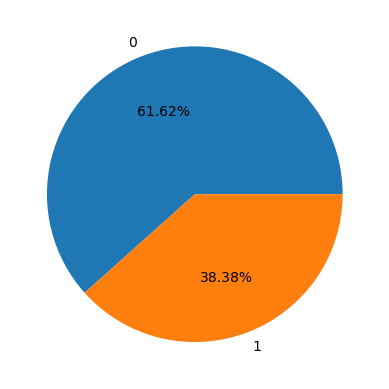

In [242]:
import matplotlib.pyplot as plt
plt.pie(labels=df.Survived.value_counts().index,x=df.Survived.value_counts().values,autopct='%.2f%%')
plt.show()

The pie chart shows 
* 61% data in 0 class and
* 38%on 1 class
Which means data is imbalanced.

if data is imbalanced we use oversampling or Undersampling Technique to balance the data
For imbalanced data we cannot we accuracy as evaluation metric.

# does pclass affect Survived?

In [243]:
import seaborn as sns

<Axes: xlabel='Pclass', ylabel='count'>

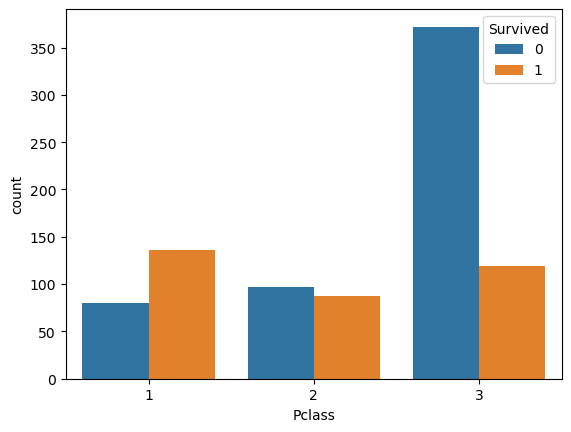

In [244]:
sns.countplot(x="Pclass",hue='Survived',data=df)

In [245]:
# Most people survived in pclass 1
# Most peoplr died in pclass 3 
# pclass affects survived

<Axes: xlabel='Sex', ylabel='count'>

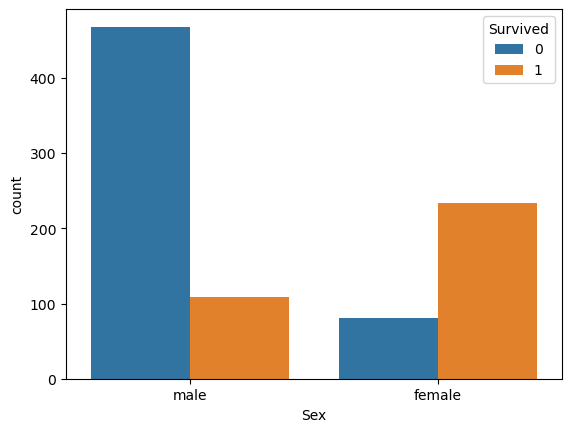

In [246]:
sns.countplot(x="Sex",hue='Survived',data=df)

In [247]:
# Most of the men died
# Most of the female Survived 
# It means sex affects survived


<Axes: xlabel='Pclass', ylabel='Age'>

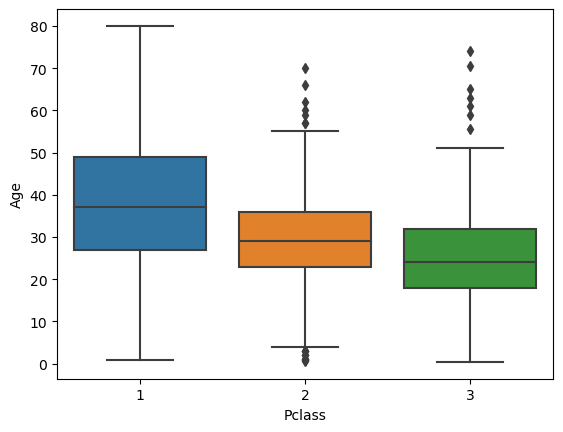

In [248]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [249]:
df.groupby(['Pclass']).Age.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [250]:
def fill_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isna(age) and pclass==1:
        return 37
    elif pd.isna(age) and pclass==2:
        return 29
    elif pd.isna(age) and pclass==3:
        return 24
    else:
        return age

In [251]:
df.Age=df[['Age','Pclass']].apply(fill_age,axis="columns")

In [252]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [253]:
del df['Cabin']
df.dropna(inplace=True)

In [254]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [255]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True) 
#here we delete passengerid name and ticket .it is irrevelent feature here

In [265]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [266]:
X=df.iloc[:,1:]
y=df.Survived

In [267]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [269]:
X_encoded=pd.get_dummies(columns=["Sex",'Embarked'],data=X,drop_first=True)

In [270]:
X_encoded.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True


In [271]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_encoded,y,test_size=0.2,random_state=40)


In [272]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Evaluation

In [273]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

In [274]:
confusion_matrix(y_test,y_pred)

array([[92, 18],
       [17, 51]], dtype=int64)

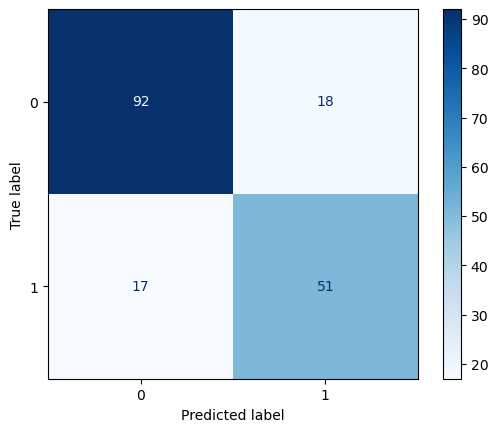

In [275]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap="Blues")

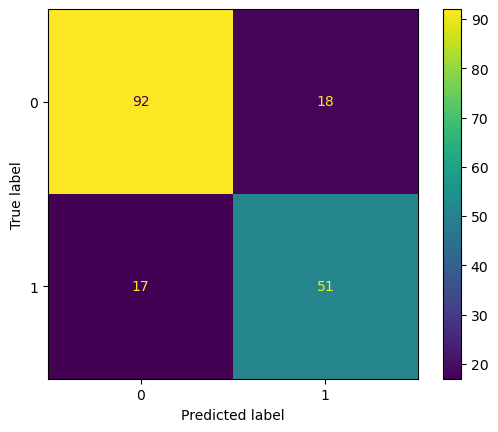

In [276]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [277]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.74        68

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [278]:
precision_score(y_test,y_pred)

0.7391304347826086

In [279]:
f1_score(y_test,y_pred)

0.7445255474452556

In [280]:
recall_score(y_test,y_pred)

0.75